In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('baseball.csv')

In [4]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [5]:
df.shape

(30, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [11]:
df.isna().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [12]:
x = df.drop('W', axis=1)
y = df['W']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=101)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr = LinearRegression()

In [17]:
lr.fit(x_train, y_train)

LinearRegression()

In [18]:
lr.intercept_

34.206326860552636

In [19]:
lr.coef_

array([ 0.1714912 ,  0.01452753, -0.02425642, -0.36850942,  0.30220427,
       -0.08570371,  0.00699122, -0.01039603,  0.03082718,  0.13807349,
       -0.18579439, -4.96596992,  2.34738839,  0.18934177,  1.05799396,
       -0.19760613])

In [22]:
corr = pd.DataFrame(lr.coef_, index=x.columns, columns=['coeff'])
corr

,coeff
R,0.171491
AB,0.014528
H,-0.024256
2B,-0.368509
3B,0.302204
HR,-0.085704
BB,0.006991
SO,-0.010396
SB,0.030827
RA,0.138073


In [25]:
pred = lr.predict(x_test)
pred

array([76.31557749, 47.36732119, 77.88752979, 58.42463144, 87.42767986,
       82.29293395, 91.36113342, 84.12766663, 97.0542523 ])

In [26]:
y_test

20    90
24    63
7     81
18    68
2     81
27    79
26    84
16    98
25    92
Name: W, dtype: int64

In [27]:
import matplotlib.pyplot as plt

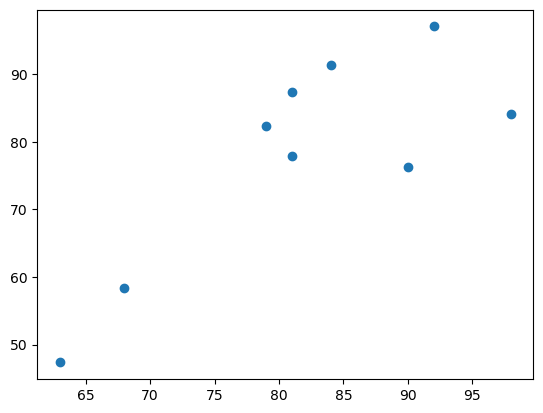

In [28]:
plt.scatter(y_test, pred)

In [29]:
from sklearn import metrics

In [30]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 8.66814144378389
MSE: 95.26123190888568
RMSE: 9.760186059132565
